# [TEMPLATE] DATASET DEPURADO

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [4]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

<hr>

# Visualizacion: Logo

- **Categoria:** `Descripcion`.
- **Objetivo:** Crear el logo principal del informe utilizando un wordcloud de las palabras que mas se repiten en la descripcion de las publicaciones.
- **Procedimiento:** Separaremos primero las palabras en una lista, y luego crearemos un wordcloud en base a una plantilla con forma de casa.

In [5]:
df.shape

(240000, 23)

In [6]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud
import random

In [7]:
df2 = df.copy()
#df2 = df2.loc[:10000, :]
# cantidad de datos que quiero

In [8]:
PALABRAS_NO_DESEADAS = ["con","para","todo", "cuenta","tiene"]
descripciones = df2['descripcion'].dropna().to_list()
words = ""
for descripcion in descripciones:
    palabras = descripcion.split()
    
    for palabra in palabras:
        palabra.lower()
        if (palabra.isalpha() and (len(palabra) > 3) and palabra not in PALABRAS_NO_DESEADAS):
            words+=palabra+' '
words= words.rstrip(' ')

In [9]:
# Funcion a tocar para cambiar el color
def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(22, 50%%, %d%%)" % random.randint(0, 40)


In [10]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
house_mask = np.array(Image.open(path.join(d, "./house.jpg")))

In [11]:
wc = WordCloud(background_color="white", max_words=2000, mask=house_mask,
               contour_width=0, contour_color='steelblue')
wc.generate(words)

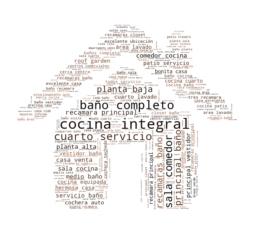

In [13]:
plt.imshow(wc.recolor(color_func=color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
wc.to_file(path.join(d, "logo.png"))

plt.show()